## Supervised classification
In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost as cat 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data_all.csv')

In [3]:
data.head(20)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.value_counts()

e     1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39     40   41   42    43     44    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59    60     61     62    63    64    65    66     67     68     69    70     71     72     73     74     75     76     77     78     79    80   81   82   83   84   85   86   87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108   109  110  111  112  113  114  115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137   138  139  140  141  142  143    144    145    146    147    148    149    150    151    152    153    154    155    156    157    158    159    160    161    162    163    164    1

In [5]:
array_data = np.array(data)

In [6]:
array_data.shape

(116322, 785)

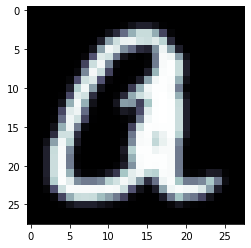

In [7]:
fig, ax = plt.subplots()
ax.imshow(array_data[0,1:].reshape(28,28), cmap=plt.cm.bone, interpolation='nearest')

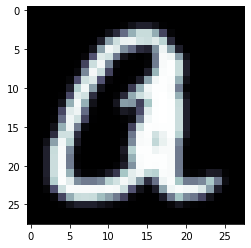

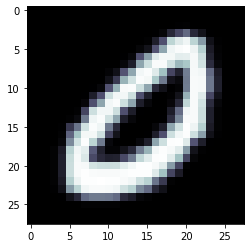

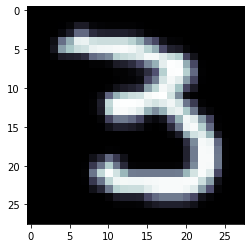

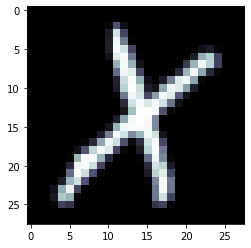

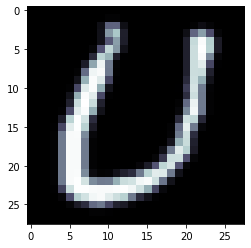

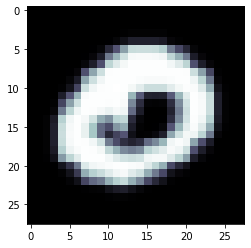

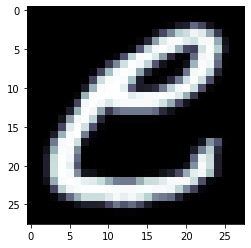

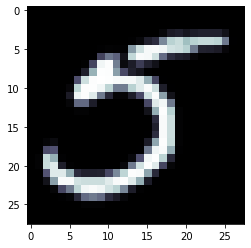

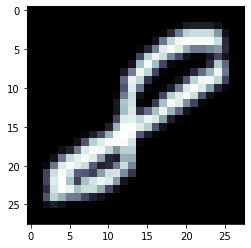

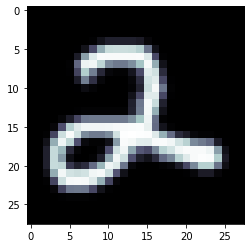

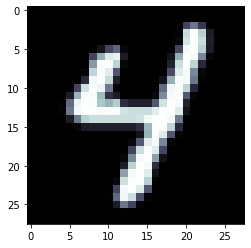

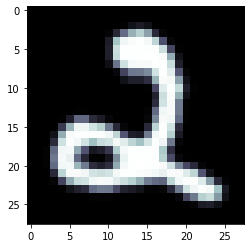

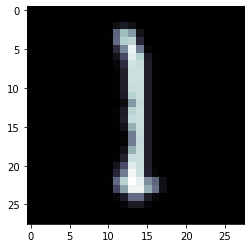

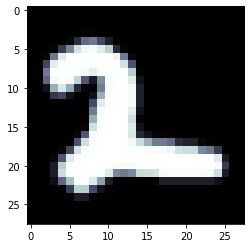

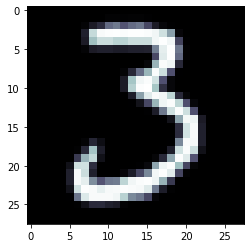

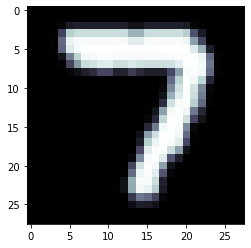

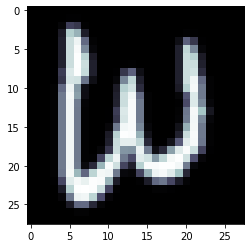

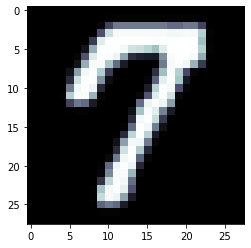

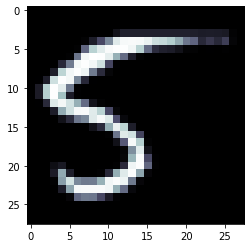

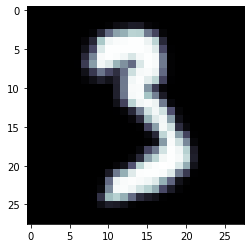

In [8]:
for i in range(20):
    fig, ax = plt.subplots()
    ax.imshow(array_data[i,1:].reshape(28,28), cmap=plt.cm.bone, interpolation='nearest')
   

In [9]:
# 0-9 Numeros
# 10-35 Upper Case
# 35-60 Lower Case

In [10]:
data['is_num'] =  np.where(data['e'] <= 9, 1, 0)

In [11]:
data['is_upper']= np.where((data['e'] > 9) & (data['e'] <= 35), 1, 0) 

In [12]:
data['is_lower']= np.where((data['e'] > 35) & (data['e'] <= 60), 1, 0) 

In [13]:
data.head()

,e,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,784,is_num,is_upper,is_lower
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [14]:
def tester_function(y_test, y_pred):
    f1= f1_score(y_test, y_pred, average=None)
    rec= recall_score(y_test, y_pred, average=None)
    pre=precision_score(y_test, y_pred, average=None)
    
    print('f1:', f1)
    print('rec:', rec)
    print('f1:', pre)

Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.


In [15]:
# DecisionTree, LogisticRegression, Kneighbours, CatboostClassifier, Randomforest

In [16]:
#Decision Tree

In [17]:
new_data=data.drop(['e'], axis=1)

In [18]:
X = new_data.drop(['is_upper','is_lower','is_num'], axis=1)
y = new_data['is_upper']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.7627660671916372

In [21]:
tester_function(y_test, y_pred)

f1: [0.83700711 0.56431955]
rec: [0.83517209 0.56765341]
f1: [0.83885022 0.56102461]


In [22]:
#LogisticRegression

In [23]:
log_reg=LogisticRegression()
log_reg = log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)


In [24]:
accuracy_score(y_test, y_pred)

0.7490801554279426

In [25]:
tester_function(y_test, y_pred
                )

f1: [0.8441711  0.35624173]
rec: [0.93187176 0.25651124]
f1: [0.77155795 0.58285219]


In [26]:
#Kneighbours

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.8564354733331041

In [30]:
tester_function(y_test, y_pred
               )

f1: [0.90350168 0.71974223]
rec: [0.92149929 0.68110786]
f1: [0.88619361 0.76302306]


In [32]:
#Randomforest

In [33]:
randf= RandomForestClassifier()
randf= randf.fit(X_train,y_train)
y_pred= randf.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.853512602730305

In [35]:
tester_function(y_test, y_pred
               )

f1: [0.90477894 0.68265793]
rec: [0.95421971 0.58213696]
f1: [0.86020911 0.82513956]


In [36]:
#CatboostClassifier

In [37]:
cat_fit = cat.CatBoostClassifier(iterations=500, depth=3, od_type="Iter", od_wait=50)
cat_fit.fit(X_train, y_train, eval_set=(X_test, y_test))


Learning rate set to 0.129186
0:	learn: 0.6584198	test: 0.6585616	best: 0.6585616 (0)	total: 145ms	remaining: 1m 12s
1:	learn: 0.6299637	test: 0.6300828	best: 0.6300828 (1)	total: 246ms	remaining: 1m 1s
2:	learn: 0.6071490	test: 0.6072514	best: 0.6072514 (2)	total: 333ms	remaining: 55.2s
3:	learn: 0.5922273	test: 0.5923360	best: 0.5923360 (3)	total: 462ms	remaining: 57.2s
4:	learn: 0.5785549	test: 0.5787478	best: 0.5787478 (4)	total: 565ms	remaining: 56s
5:	learn: 0.5694260	test: 0.5696990	best: 0.5696990 (5)	total: 655ms	remaining: 54s
6:	learn: 0.5615343	test: 0.5618369	best: 0.5618369 (6)	total: 748ms	remaining: 52.7s
7:	learn: 0.5558432	test: 0.5560865	best: 0.5560865 (7)	total: 835ms	remaining: 51.3s
8:	learn: 0.5509662	test: 0.5513538	best: 0.5513538 (8)	total: 935ms	remaining: 51s
9:	learn: 0.5457796	test: 0.5462274	best: 0.5462274 (9)	total: 1.07s	remaining: 52.3s
10:	learn: 0.5414426	test: 0.5418639	best: 0.5418639 (10)	total: 1.16s	remaining: 51.7s
11:	learn: 0.5380736	test: 

96:	learn: 0.4696420	test: 0.4724375	best: 0.4724375 (96)	total: 9.47s	remaining: 39.4s
97:	learn: 0.4692244	test: 0.4720034	best: 0.4720034 (97)	total: 9.56s	remaining: 39.2s
98:	learn: 0.4687601	test: 0.4715512	best: 0.4715512 (98)	total: 9.64s	remaining: 39s
99:	learn: 0.4682348	test: 0.4710477	best: 0.4710477 (99)	total: 9.73s	remaining: 38.9s
100:	learn: 0.4675108	test: 0.4702896	best: 0.4702896 (100)	total: 9.84s	remaining: 38.9s
101:	learn: 0.4673430	test: 0.4701127	best: 0.4701127 (101)	total: 9.94s	remaining: 38.8s
102:	learn: 0.4665887	test: 0.4695365	best: 0.4695365 (102)	total: 10.1s	remaining: 38.8s
103:	learn: 0.4659116	test: 0.4689830	best: 0.4689830 (103)	total: 10.2s	remaining: 38.8s
104:	learn: 0.4650857	test: 0.4681677	best: 0.4681677 (104)	total: 10.3s	remaining: 38.9s
105:	learn: 0.4641731	test: 0.4672052	best: 0.4672052 (105)	total: 10.5s	remaining: 39.1s
106:	learn: 0.4636160	test: 0.4667448	best: 0.4667448 (106)	total: 10.6s	remaining: 39s
107:	learn: 0.4629802	

188:	learn: 0.4294302	test: 0.4366982	best: 0.4366982 (188)	total: 19.9s	remaining: 32.8s
189:	learn: 0.4292972	test: 0.4366061	best: 0.4366061 (189)	total: 20s	remaining: 32.6s
190:	learn: 0.4291812	test: 0.4365373	best: 0.4365373 (190)	total: 20.1s	remaining: 32.5s
191:	learn: 0.4286027	test: 0.4359549	best: 0.4359549 (191)	total: 20.2s	remaining: 32.5s
192:	learn: 0.4283592	test: 0.4357044	best: 0.4357044 (192)	total: 20.3s	remaining: 32.3s
193:	learn: 0.4280821	test: 0.4354253	best: 0.4354253 (193)	total: 20.4s	remaining: 32.2s
194:	learn: 0.4279492	test: 0.4353270	best: 0.4353270 (194)	total: 20.5s	remaining: 32.1s
195:	learn: 0.4276536	test: 0.4350575	best: 0.4350575 (195)	total: 20.7s	remaining: 32.1s
196:	learn: 0.4273627	test: 0.4347285	best: 0.4347285 (196)	total: 20.9s	remaining: 32.2s
197:	learn: 0.4269508	test: 0.4344575	best: 0.4344575 (197)	total: 21s	remaining: 32.1s
198:	learn: 0.4264540	test: 0.4340189	best: 0.4340189 (198)	total: 21.1s	remaining: 32s
199:	learn: 0.42

281:	learn: 0.4051645	test: 0.4158675	best: 0.4158675 (281)	total: 31s	remaining: 24s
282:	learn: 0.4048782	test: 0.4156579	best: 0.4156579 (282)	total: 31.1s	remaining: 23.9s
283:	learn: 0.4046831	test: 0.4155155	best: 0.4155155 (283)	total: 31.2s	remaining: 23.7s
284:	learn: 0.4045400	test: 0.4154076	best: 0.4154076 (284)	total: 31.3s	remaining: 23.6s
285:	learn: 0.4042602	test: 0.4151658	best: 0.4151658 (285)	total: 31.5s	remaining: 23.5s
286:	learn: 0.4037720	test: 0.4147117	best: 0.4147117 (286)	total: 31.6s	remaining: 23.5s
287:	learn: 0.4035498	test: 0.4144733	best: 0.4144733 (287)	total: 31.8s	remaining: 23.4s
288:	learn: 0.4032830	test: 0.4142264	best: 0.4142264 (288)	total: 31.9s	remaining: 23.3s
289:	learn: 0.4031845	test: 0.4141848	best: 0.4141848 (289)	total: 32s	remaining: 23.2s
290:	learn: 0.4029539	test: 0.4140111	best: 0.4140111 (290)	total: 32.2s	remaining: 23.1s
291:	learn: 0.4026871	test: 0.4137960	best: 0.4137960 (291)	total: 32.3s	remaining: 23s
292:	learn: 0.4024

373:	learn: 0.3868966	test: 0.4008346	best: 0.4008346 (373)	total: 43.4s	remaining: 14.6s
374:	learn: 0.3867266	test: 0.4007413	best: 0.4007413 (374)	total: 43.5s	remaining: 14.5s
375:	learn: 0.3865712	test: 0.4006018	best: 0.4006018 (375)	total: 43.8s	remaining: 14.4s
376:	learn: 0.3862841	test: 0.4003702	best: 0.4003702 (376)	total: 44.1s	remaining: 14.4s
377:	learn: 0.3862220	test: 0.4003564	best: 0.4003564 (377)	total: 44.3s	remaining: 14.3s
378:	learn: 0.3859807	test: 0.4001460	best: 0.4001460 (378)	total: 44.6s	remaining: 14.2s
379:	learn: 0.3858477	test: 0.4000746	best: 0.4000746 (379)	total: 44.7s	remaining: 14.1s
380:	learn: 0.3856562	test: 0.3998849	best: 0.3998849 (380)	total: 44.9s	remaining: 14s
381:	learn: 0.3854247	test: 0.3997107	best: 0.3997107 (381)	total: 45.2s	remaining: 13.9s
382:	learn: 0.3852699	test: 0.3996517	best: 0.3996517 (382)	total: 45.3s	remaining: 13.9s
383:	learn: 0.3851628	test: 0.3996083	best: 0.3996083 (383)	total: 45.5s	remaining: 13.7s
384:	learn: 

465:	learn: 0.3738951	test: 0.3910417	best: 0.3910417 (465)	total: 58.9s	remaining: 4.3s
466:	learn: 0.3738019	test: 0.3910283	best: 0.3910283 (466)	total: 59.1s	remaining: 4.17s
467:	learn: 0.3736811	test: 0.3909315	best: 0.3909315 (467)	total: 59.2s	remaining: 4.05s
468:	learn: 0.3735510	test: 0.3908511	best: 0.3908511 (468)	total: 59.4s	remaining: 3.92s
469:	learn: 0.3734552	test: 0.3908012	best: 0.3908012 (469)	total: 59.5s	remaining: 3.8s
470:	learn: 0.3733277	test: 0.3907157	best: 0.3907157 (470)	total: 59.6s	remaining: 3.67s
471:	learn: 0.3732321	test: 0.3906538	best: 0.3906538 (471)	total: 59.7s	remaining: 3.54s
472:	learn: 0.3730781	test: 0.3905555	best: 0.3905555 (472)	total: 59.9s	remaining: 3.42s
473:	learn: 0.3728875	test: 0.3904240	best: 0.3904240 (473)	total: 60s	remaining: 3.29s
474:	learn: 0.3728413	test: 0.3904374	best: 0.3904240 (473)	total: 1m	remaining: 3.16s
475:	learn: 0.3727143	test: 0.3903628	best: 0.3903628 (475)	total: 1m	remaining: 3.04s
476:	learn: 0.372519

In [38]:
accuracy_score(y_test, y_pred)

0.853512602730305

In [39]:
tester_function(y_test, y_pred
               )

f1: [0.90477894 0.68265793]
rec: [0.95421971 0.58213696]
f1: [0.86020911 0.82513956]
